In [1]:
!pip install datapane altair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.6/520.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00
  Created wheel for micawber: filename=micawber-0.5.5-py3-none-any.whl size=22433 sha256=f6f1c0a557b9959053db9471f2884f04c741c2811e3bd3946e915a67df3e682e
  Stored in directory: /root/.cache/pip/wheels/31/3a/1f/bbd88c767423821f2fe497c0ada47581292f96419b56d689c0
Successfully built micawber
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [2]:
from google.colab import drive
import os

MOUNT = True
FILEPATH = "/content/gdrive/MyDrive/HackYeah 2023 - dane/End product"

if MOUNT:
  drive.mount("/content/gdrive")



Mounted at /content/gdrive


In [3]:
import altair as alt
import datapane as dp
from vega_datasets import data
import pandas as pd

dp.enable_logging()

df = pd.read_csv(f"{FILEPATH}/ultramerge.csv", index_col=0, decimal=",")

# Etaty

[09:18:09] [DEBUG] No Bokeh Found
[09:18:09] [DEBUG] <View version="1" fragment="false">
  <Plot type="image/svg+xml" responsive="true" scale="1.0" src="ref://0636b9f90e" caption="Dystrybucja rodzaju etatów"/>
</View>

[09:18:09] [INFO ] Detected IPython environment: Google Colab Environment


App saved to ./etaty.html

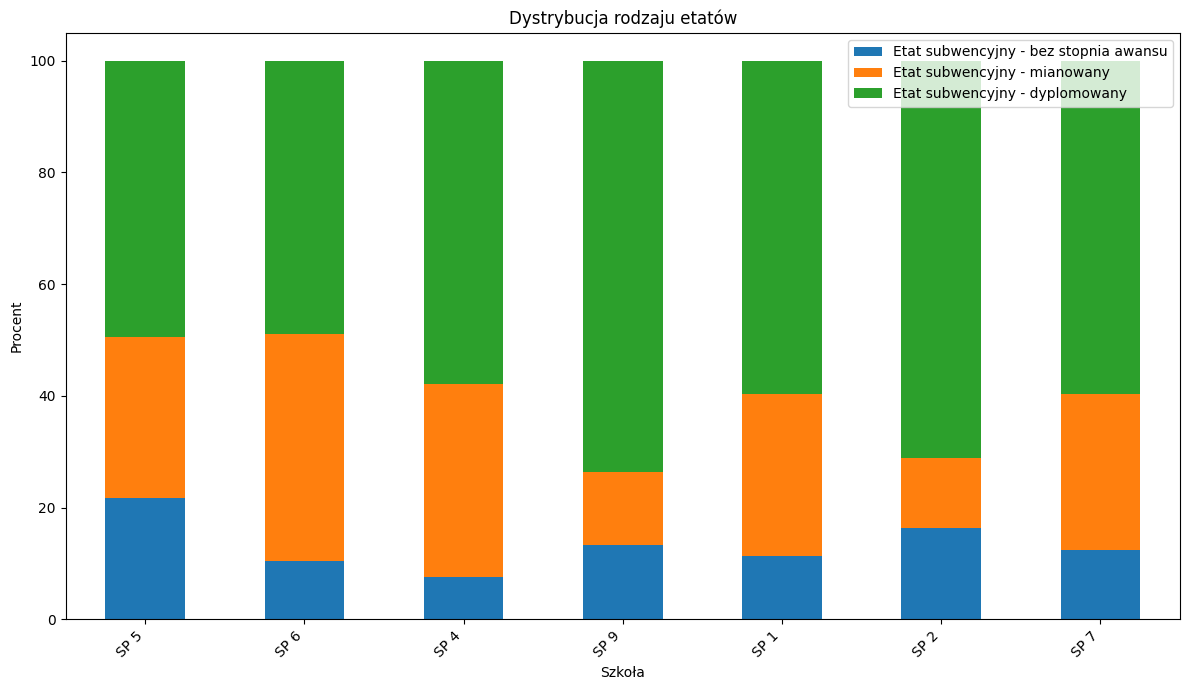

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datapane as dp

# Sample data (assuming df is your DataFrame)
# df = ...

# Columns of interest
cols_of_interest = [
    "Etat subwencyjny - bez stopnia awansu",
    "Etat subwencyjny - mianowany",
    "Etat subwencyjny - dyplomowany"
]

# Total employment for each school
total_employment_per_school = df[cols_of_interest].sum(axis=1)

# Convert counts to percentages
df_percentage = (df[cols_of_interest].T / total_employment_per_school).T * 100

# Set the index to be the school names for plotting
df_percentage.set_index(df["Szkoła"], inplace=True)

# Create a stacked bar chart
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Dystrybucja rodzaju etatów")
plt.xlabel("Szkoła")
plt.ylabel("Procent")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Convert the plot to a Datapane report
# plot_filename = "employment_distribution_per_school.png"
# plt.savefig(plot_filename)
# plt.close()

# Upload the plot to Datapane
report = dp.Report(
    dp.Plot(ax, caption="Dystrybucja rodzaju etatów")
)

etaty_blocks = [dp.Plot(ax, caption="Dystrybucja rodzaju etatów")]

dp.save_report(report, path="etaty.html")


# Subwencje

In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Reading the data and processing to get sum of subwencja for each school

subwencja_total = alt.Chart(df.sort_values(by="subwencja_total", ascending=False)).mark_bar().encode(
    x='Szkoła:N',
    y='subwencja_total:Q',
    tooltip=['Szkoła', 'subwencja_total']
).properties(
    title='Subwencje total',
    width=700,
    height=400
)

subwencja_per_pupil = alt.Chart(df.sort_values(by="subwencja_per_uczeń", ascending=False)).mark_bar().encode(
    x='Szkoła:N',
    y='subwencja_per_uczeń:Q',
    tooltip=['Szkoła', 'subwencja_per_uczeń']
).properties(
    title='Subwancje per uczeń',
    width=700,
    height=400
)


##

df_melted = df.melt(id_vars=["Szkoła"],
                    value_vars=[f"P{i}" for i in range(1, 73)],
                    var_name="Subvention_Type",
                    value_name="Value")

# Remove rows where Value is 0
df_melted = df_melted[df_melted['Value'] != 0]

# Altair chart with dropdown
input_dropdown = alt.binding_select(options=df['Szkoła'].unique().tolist())
selection = alt.selection_single(fields=['Szkoła'], bind=input_dropdown, name='Select')

subwencja_per_px = alt.Chart(df_melted).mark_arc(innerRadius=50).encode(
    theta='Value:Q',
    color='Subvention_Type:N',
    tooltip=['Subvention_Type', 'Value']
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    title='Struktura subwencji',
    width=400,
    height=400
)


report = dp.Report(
    dp.Text("# Subwencja per szkoła"),
    dp.Plot(subwencja_total, caption="Ilość subwencji per szkoła"),
    dp.Plot(subwencja_per_pupil, caption="Ilość subwencji per uczeń"),
    dp.Plot(subwencja_per_px, caption="Ilość subwencji per typ"),
)
# dp.save_report(report, path="subwencje.html")


/usr/local/lib/python3.10/dist-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/usr/local/lib/python3.10/dist-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


# Dotacje

In [6]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Reading the data and processing to get sum of subwencja for each school

doplata_total = alt.Chart(df.sort_values(by="dopłata_total", ascending=False)).mark_bar().encode(
    x='Szkoła:N',
    y='dopłata_total:Q',
    tooltip=['Szkoła', 'dopłata_total']
).properties(
    title='Doplata total',
    width=700,
    height=400
)

doplata_per_pupil = alt.Chart(df.sort_values(by="dopłata_per_uczeń", ascending=False)).mark_bar().encode(
    x='Szkoła:N',
    y='dopłata_per_uczeń:Q',
    tooltip=['Szkoła', 'dopłata_per_uczeń']
).properties(
    title='Doplata per uczeń',
    width=700,
    height=400
)

doplata_per_stanine = alt.Chart(df.sort_values(by="dopłata_per_stanin", ascending=False)).mark_bar().encode(
    x='Szkoła:N',
    y='dopłata_per_stanin:Q',
    tooltip=['Szkoła', 'dopłata_per_stanin']
).properties(
    title='Doplata per stanin',
    width=700,
    height=400
)


doplata_per_etat = alt.Chart(df.sort_values(by="dopłata_per_etat_total", ascending=False)).mark_bar().encode(
    x='Szkoła:N',
    y='dopłata_per_etat_total:Q',
    tooltip=['Szkoła', 'dopłata_per_etat_total']
).properties(
    title='Doplata per etat',
    width=700,
    height=400
)

report = dp.Report(
    dp.Text("# Dopłaty dla szkół"),
    dp.Plot(doplata_total, caption="Ilość dopłaty per szkoła"),
    dp.Plot(doplata_per_pupil, caption="Ilość dopłaty per uczeń"),
    dp.Plot(doplata_per_stanine, caption="Ilość dopłaty per stanin"),
    dp.Plot(doplata_per_etat, caption="Ilość dopłaty per etat"),

)
# dp.save_report(report, path="doplaty.html")


In [7]:

combined_report = dp.Report(
    dp.Text("# Subwencje dla szkół"),
    dp.Plot(subwencja_total, caption="Ilość subwencji"),
    dp.Plot(subwencja_per_pupil, caption="Ilość subwencji per uczeń"),
    dp.Plot(subwencja_per_px, caption="Ilość subwencji per typ"),
    dp.Text("---"),
    dp.Text("# Dopłaty dla szkół"),
    dp.Plot(doplata_total, caption="Ilość dopłaty"),
    dp.Plot(doplata_per_pupil, caption="Ilość dopłaty per uczeń"),
    dp.Plot(doplata_per_stanine, caption="Ilość dopłaty per stanin"),
    dp.Plot(doplata_per_etat, caption="Ilość dopłaty per etat"),
)

combined_report.save(path="finanse.html")

finanse_blocks = [
    dp.Text("# Subwencje dla szkół"),
    dp.Plot(subwencja_total, caption="Ilość subwencji"),
    dp.Plot(subwencja_per_pupil, caption="Ilość subwencji per uczeń"),
    dp.Plot(subwencja_per_px, caption="Ilość subwencji per typ"),
    dp.Text("---"),
    dp.Text("# Dopłaty dla szkół"),
    dp.Plot(doplata_total, caption="Ilość dopłaty"),
    dp.Plot(doplata_per_pupil, caption="Ilość dopłaty per uczeń"),
    dp.Plot(doplata_per_stanine, caption="Ilość dopłaty per stanin"),
    dp.Plot(doplata_per_etat, caption="Ilość dopłaty per etat"),
]

[09:18:13] [DEBUG] <View version="1" fragment="false">
  <Text><![CDATA[# Subwencje dla szkół]]></Text>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://9e534709fa" caption="Ilość subwencji"/>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://fa033d67d9" caption="Ilość subwencji per uczeń"/>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://5bf9b6020e" caption="Ilość subwencji per typ"/>
  <Text><![CDATA[---

# Dopłaty dla szkół]]></Text>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://cc43190647" caption="Ilość dopłaty"/>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://cc7b7bb127" caption="Ilość dopłaty per uczeń"/>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://32becc4604" caption="Ilość dopłaty per stanin"/>
  <Plot type="application/vnd.vegalit

App saved to ./finanse.html

In [9]:
import altair as alt
import datapane as dp

# Assuming df is already loaded

# Dropdown selection for schools with a default school set
default_school = df['Szkoła'].iloc[0]
input_dropdown = alt.binding_select(options=df['Szkoła'].unique().tolist())
selection = alt.selection_single(fields=['Szkoła'], bind=input_dropdown, name='Wybierz')

# Function to create text charts
def create_text_chart(field_name, title):
    chart = alt.Chart(df).mark_text(size=20, font='Courier', fontWeight=600).encode(
        text=alt.Text(f"{field_name}:Q", format=".2f"),
        color=alt.condition(
            alt.datum[field_name] > df[field_name].median(),  # Compare with median for demo. Adjust condition as needed.
            alt.value('red'),  # Positive values in green
            alt.value('green')     # Negative or lower values in red
        )
    ).transform_filter(
        selection
    ).properties(
        title=title,
        height=50  # setting a small height as these are text charts
    )
    return chart

# Create individual text charts
subwencja_text = create_text_chart("subwencja_total", "Subwencja Total")
subwencja_per_uczeń_text = create_text_chart("subwencja_per_uczeń", "Subwencja per Uczeń")
dopłata_text = create_text_chart("dopłata_total", "Dopłata Total")
dopłata_per_uczeń_text = create_text_chart("dopłata_per_uczeń", "Dopłata per Uczeń")
dopłata_per_stanin_text = create_text_chart("dopłata_per_stanin", "Dopłata per Stanin")

subwencja_per_px_school = alt.Chart(df_melted).mark_arc(innerRadius=50).encode(
    theta='Value:Q',
    color='Subvention_Type:N',
    tooltip=['Subvention_Type', 'Value']
).transform_filter(
    selection
).properties(
    title='Structure of Subventions',
    width=400,
    height=400
)

# Combine all the text charts
text_charts_combined = alt.vconcat(subwencja_text, subwencja_per_uczeń_text, dopłata_text, dopłata_per_uczeń_text, dopłata_per_stanin_text).add_selection(selection)

final_chart = alt.hconcat(text_charts_combined, subwencja_per_px_school)

report_blocks = [
    dp.Text("# Dane dla szkoły"),
    dp.Plot(final_chart),
    dp.Text("- Zielony - poniżej średniej"),
    dp.Text("- Czerwony - powyżej średniej"),
]

report = dp.Report(*report_blocks)
report.save(path="raport_szkola.html")


/usr/local/lib/python3.10/dist-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
[09:18:28] [DEBUG] <View version="1" fragment="false">
  <Text><![CDATA[# Dane dla szkoły]]></Text>
  <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://c1722cf8ca"/>
  <Text><![CDATA[- Zielony - poniżej średniej

- Czerwony - powyżej średniej]]></Text>
</View>



App saved to ./raport_szkola.html

In [10]:
etaty_group = dp.Group(*etaty_blocks, label="Etaty")
finanse_group = dp.Group(*finanse_blocks, label="Finanse")
szkoly_group = dp.Group(*report_blocks, label="Szkoły")

polska_select = dp.Select(szkoly_group, finanse_group, etaty_group)
polska_page = dp.Page(polska_select, title="Kutno")

# dp.Report(polska_select).save("polska.html")


In [11]:
media = []

media.extend([
    dp.Text('Dystrybucja średniej oceny'),
    dp.Media(file='avg_grades_8_g_dist.png'),
    dp.Text('Dystrybucja średniej oceny z matematyki'),
    dp.Media(file='avg_math_8_dist.png'),
    dp.Text('Dystrybucja średniej oceny z czytania'),
    dp.Media(file='avg_reading_8_dist.png'),
    dp.Text('Wpływ cech na wartości odstające'),
    dp.Media(file='mega_interaktywne.png'),
    dp.Text('PCA - wydatki per klaster'),
    dp.Media(file='pca_expenditure.png'),
    dp.Text('PCA - Klastery ocen'),
    dp.Media(file='pca_grades.png'),
    dp.Text('Dystrybucja wydatków'),
    dp.Media(file='total_exp_dist.png'),
    dp.Text('Dystrybucja przychodów'),
    dp.Media(file='total_revenue_dist.png'),
    dp.Text('Wydatki szkoły względem innych szkół o podobnych wynikach'),
    dp.Media(file='similar_schools_spending.png', caption='Twoja szkoła ma 65.03% mniejsze wydatki od podobnych szkół'),
    dp.Text('Wpływ cech szkół na klasteryzację'),
    dp.Media(file='features_to_clasters.png'),
])

In [12]:
usa_page = dp.Page(*media, title="USA")

In [15]:
dp.Report(polska_page, usa_page).save("output.html")

[09:19:31] [DEBUG] <View version="1" fragment="false">
  <Select type="tabs">
    <Group label="Kutno" columns="1" valign="top">
      <Select type="tabs">
        <Group label="Szkoły" columns="1" valign="top">
          <Text><![CDATA[# Dane dla szkoły]]></Text>
          <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://c1722cf8ca"/>
          <Text><![CDATA[- Zielony - poniżej średniej

- Czerwony - powyżej średniej]]></Text>
        </Group>
        <Group label="Finanse" columns="1" valign="top">
          <Text><![CDATA[# Subwencje dla szkół]]></Text>
          <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://9e534709fa" caption="Ilość subwencji"/>
          <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://fa033d67d9" caption="Ilość subwencji per uczeń"/>
          <Plot type="application/vnd.vegalite.v5+json" responsive="true" scale="1.0" src="ref://5bf9b6020e" capti

App saved to ./output.html